In [13]:
import pandas as pd
csv_path = 'E:/chrome download/archive/healthcare-dataset-stroke-data.csv'
dataFrame = pd.read_csv(csv_path)

print(dataFrame.head()) 


      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [14]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [15]:
updated_dataFrame= dataFrame.dropna()

updated_dataFrame = updated_dataFrame.dropna().reset_index(drop=True)
updated_dataFrame.drop(updated_dataFrame[updated_dataFrame["smoking_status"] == "Unknown"].index, inplace = True)
updated_dataFrame.to_csv('healthcare-dataset-stroke-data.csv')
updated_dataFrame


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4900,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
4902,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
4905,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
4906,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [16]:
updated_dataFrame.keys()

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [17]:

updated_dataFrame['smoking_status'] = updated_dataFrame['smoking_status'].replace( ['formerly smoked', 'smokes', 'never smoked'], [1, 2, 0])
pd.set_option('display.max_columns', None)
print(updated_dataFrame)
print(updated_dataFrame.head())

         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     31112    Male  80.0             0              1          Yes   
2     60182  Female  49.0             0              0          Yes   
3      1665  Female  79.0             1              0          Yes   
4     56669    Male  81.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
4900  68398    Male  82.0             1              0          Yes   
4902  45010  Female  57.0             0              0          Yes   
4905  44873  Female  81.0             0              0          Yes   
4906  19723  Female  35.0             0              0          Yes   
4907  37544    Male  51.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi  smoking_status  \
0           Private          Urban             228.69  36.6         

In [18]:
updated_dataFrame.groupby('stroke').size()

stroke
0    3246
1     180
dtype: int64

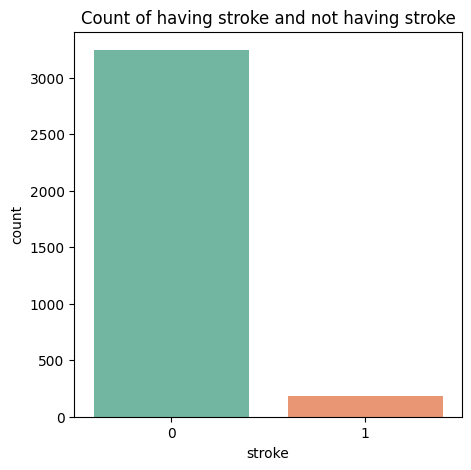

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(5,5))
sns.countplot(x='stroke', data = updated_dataFrame, palette = 'Set2')
plt.title("Count of having stroke and not having stroke");

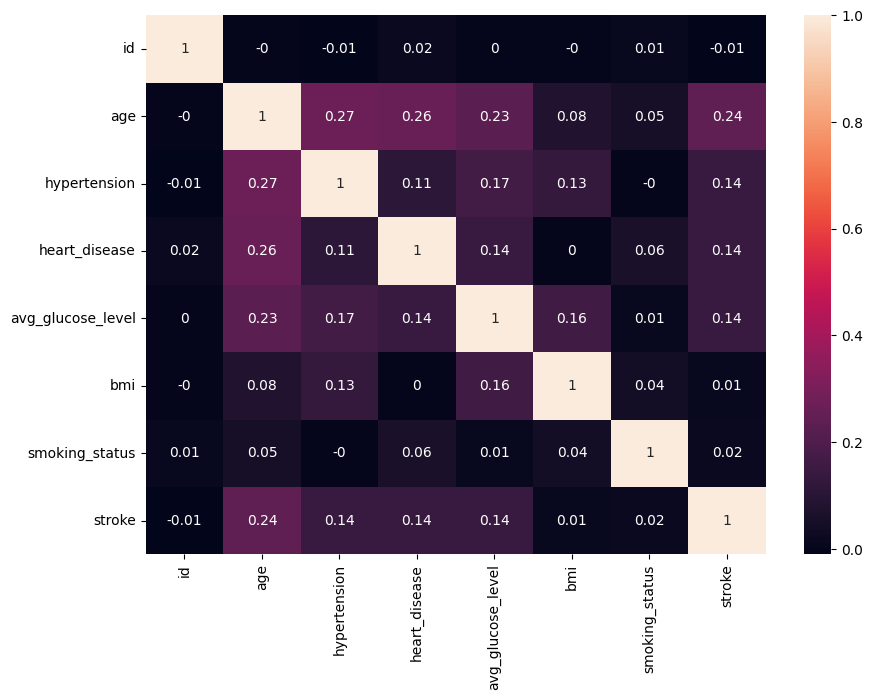

In [20]:
import numpy as np
numeric_columns = updated_dataFrame.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr().round(2)
plt.figure(figsize=(10, 7))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()


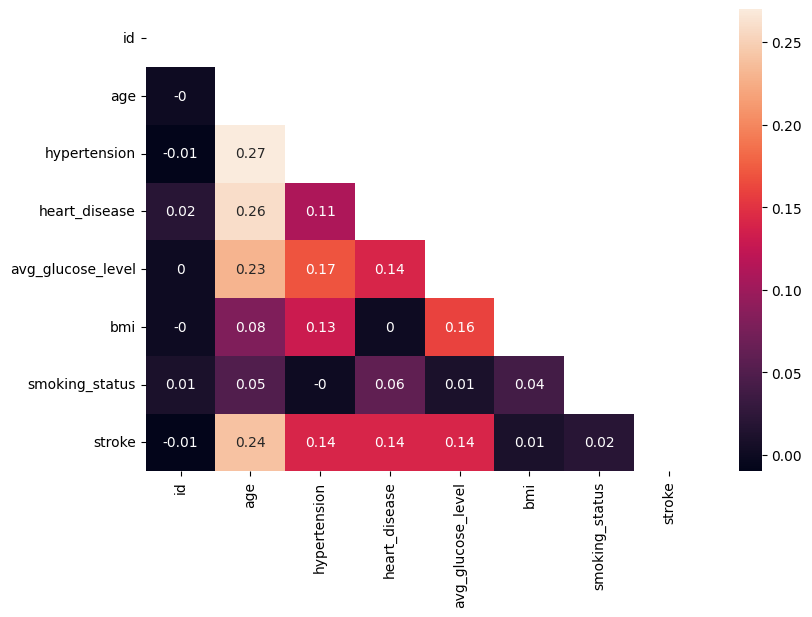

In [21]:
import numpy as np
mask = np.zeros_like(correlation_matrix)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize = (9, 6))
sns.heatmap(data=correlation_matrix, annot=True, mask=mask);


In [22]:
X = updated_dataFrame[['age','hypertension', 'heart_disease','avg_glucose_level']]
X

,age,hypertension,heart_disease,avg_glucose_level
0,67.0,0,1,228.69
1,80.0,0,1,105.92
2,49.0,0,0,171.23
3,79.0,1,0,174.12
4,81.0,0,0,186.21
...,...,...,...,...
4900,82.0,1,0,71.97
4902,57.0,0,0,77.93
4905,81.0,0,0,125.20
4906,35.0,0,0,82.99


In [23]:
y = updated_dataFrame['stroke']
y

0       1
1       1
2       1
3       1
4       1
       ..
4900    0
4902    0
4905    0
4906    0
4907    0
Name: stroke, Length: 3426, dtype: int64

In [13]:
####  splitting data into test and for train

In [56]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)
score = set()

X_train shape:  (2398, 4)
X_test shape:  (1028, 4)
y_train shape:  (2398,)
y_test shape:  (1028,)


In [29]:
#### naive byes

In [64]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
y_prediction_nb = model_nb.predict(X_test)
score_nb = metrics.accuracy_score(y_prediction_nb, y_test).round(4)
print('The accuracy of the naive bayes is: {}%'.format(score_nb*100))
score.add(('Naive Bayes', score_nb))

The accuracy of the naive bayes is: 87.45%


In [65]:
#### KNN model

In [66]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X_train, y_train)
y_prediction_knn = model_knn.predict(X_test)
score_knn = metrics.accuracy_score(y_prediction_knn, y_test).round(4)
print('The accuracy of the Knn is: {}%'.format(score_knn*100))
score.add(('Knn', score_knn))


The accuracy of the Knn is: 93.58%


In [59]:
####### decison tree

In [67]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(random_state=4)
model_dt.fit(X_train, y_train)
y_prediction_dt = model_dt.predict(X_test)
score_dt = metrics.accuracy_score(y_prediction_dt, y_test).round(4)
print('The accuracy of the DT is: {}%'.format(score_dt*100))
score.add(('Decision Tree', score_dt))

The accuracy of the DT is: 90.75999999999999%


In [68]:
### logistric regression

In [74]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_prediction_lr = model_lr.predict(X_test)
score_lr = metrics.accuracy_score(y_prediction_lr, y_test).round(4)
print('The accuracy of the LR is: {}%'.format(score_lr*100))
score.add(('Logistic Regression', score_lr))

The accuracy of the LR is: 94.94%


In [69]:
####SVM

In [71]:
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(X_train, y_train)
y_prediction_svm = model_svm.predict(X_test)
score_svm = metrics.accuracy_score(y_prediction_svm, y_test).round(4)
print('The accuracy of the SVM is: {} %'.format(score_svm*100))
score.add(('SVM', score_svm))

The accuracy of the SVM is: 94.94 %


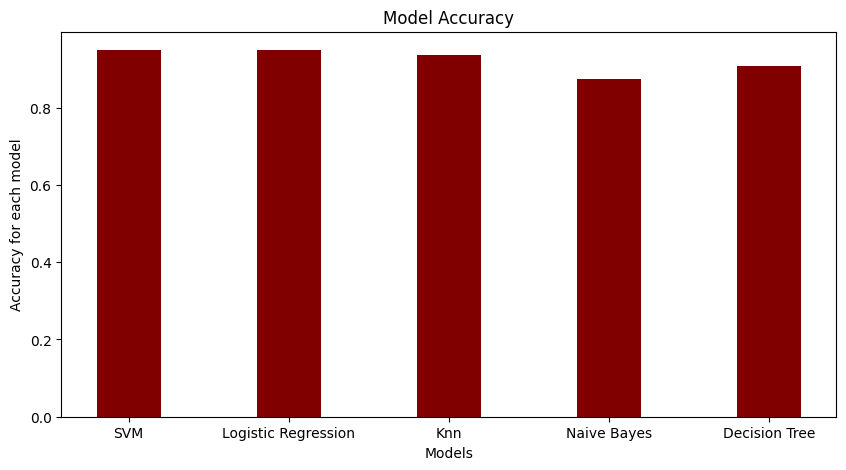

The accuracy of SVM is: 94.94%
The accuracy of Logistic Regression is: 94.94%
The accuracy of Knn is: 93.58%
The accuracy of Naive Bayes is: 87.45%
The accuracy of Decision Tree is: 90.75999999999999%


In [76]:
fig = plt.figure(figsize = (10, 5))
keys = []
values = []
for s in score:
 keys.append(s[0])
 values.append(s[1])
plt.bar(keys, values, color ='maroon',
 width = 0.4)
plt.xlabel("Models")
plt.ylabel("Accuracy for each model")
plt.title("Model Accuracy")
plt.show()

for model_name, accuracy in score:
    print(f'The accuracy of {model_name} is: {accuracy*100}%')

highest_accuracy_model = max(score, key=lambda x: x[1])
lowest_accuracy_model = min(score, key=lambda x: x[1])




In [22]:

model_names = ['Logistic Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'SVM']
accuracies = [0.9494, 0.9358, 0.8745, 0.9076, 0.9494]
precisions = [0.952, 0.937, 0.883, 0.912, 0.948]
recalls = [0.950, 0.936, 0.872, 0.906, 0.948]
f1_scores = [0.951, 0.936, 0.877, 0.909, 0.948]


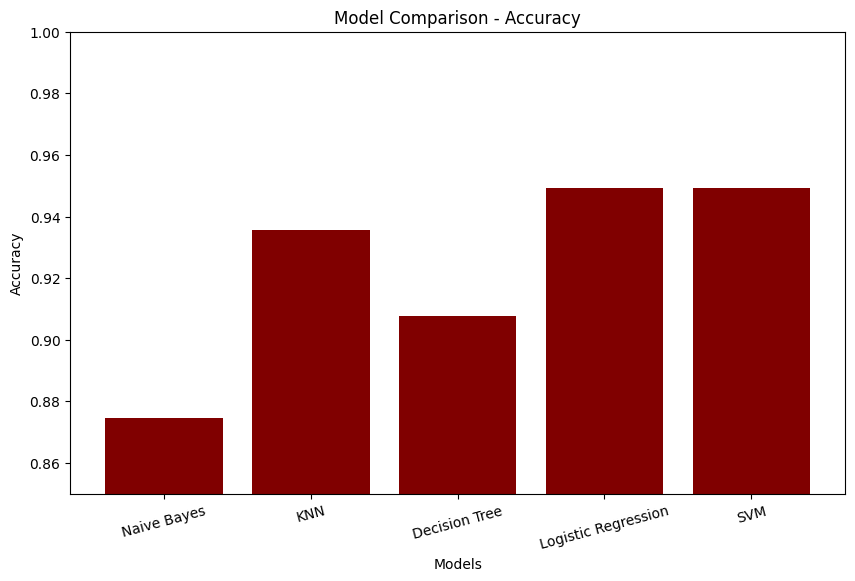

Highest accuracy: 94.94% in Logistic Regression
Lowest accuracy: 87.45% in Naive Bayes


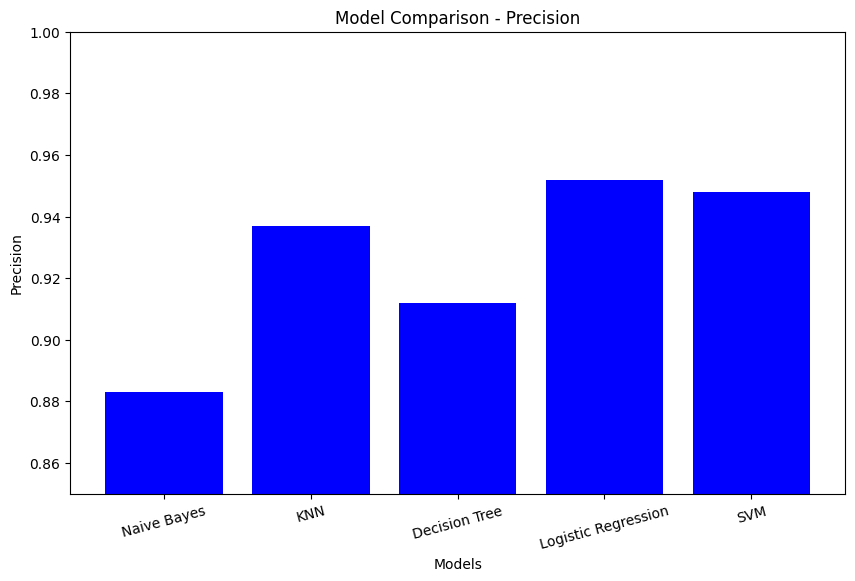

Highest precision: 95.20% in Logistic Regression
Lowest precision: 88.30% in Naive Bayes


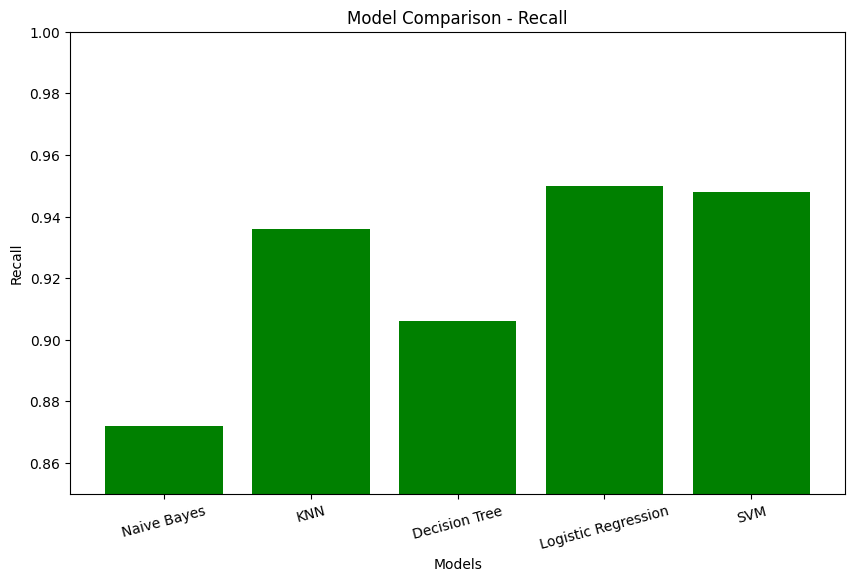

Highest recall: 95.00% in Logistic Regression
Lowest recall: 87.20% in Naive Bayes


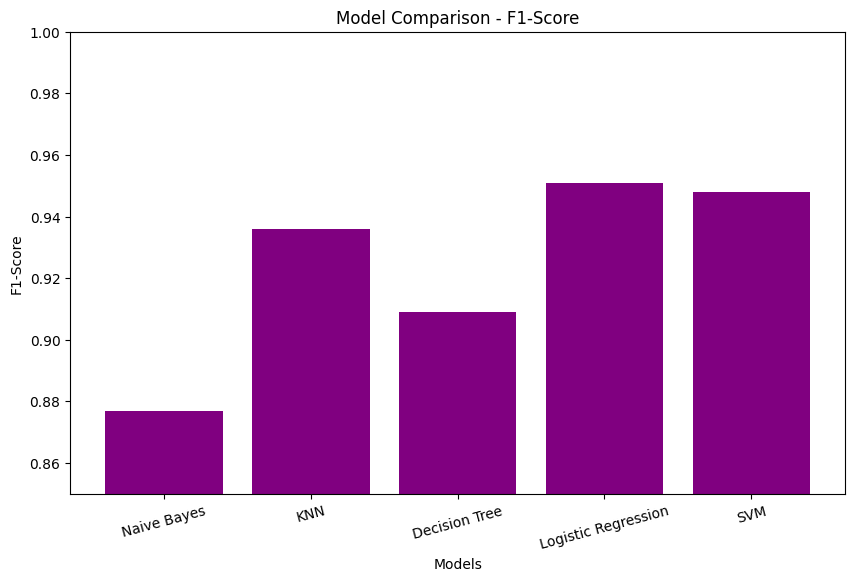

Highest F1-score: 95.10% in Logistic Regression
Lowest F1-score: 87.70% in Naive Bayes


In [38]:
import matplotlib.pyplot as plt

#### Accuracy Comparison

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='maroon')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Comparison - Accuracy')
plt.ylim([0.85, 1.0])  
plt.xticks(rotation=15)
plt.show()
highest_accuracy_model = model_names[accuracies.index(max(accuracies))]
lowest_accuracy_model = model_names[accuracies.index(min(accuracies))]
print(f"Highest accuracy: {max(accuracies)*100:.2f}% in {highest_accuracy_model}")
print(f"Lowest accuracy: {min(accuracies)*100:.2f}% in {lowest_accuracy_model}")


###3Precision comparison
plt.figure(figsize=(10, 6))
plt.bar(model_names, precisions, color='blue')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Model Comparison - Precision')
plt.ylim([0.85, 1.0])  # Set y-axis range
plt.xticks(rotation=15)
plt.show()
highest_precision_model = model_names[precisions.index(max(precisions))]
lowest_precision_model = model_names[precisions.index(min(precisions))]
print(f"Highest precision: {max(precisions)*100:.2f}% in {highest_precision_model}")
print(f"Lowest precision: {min(precisions)*100:.2f}% in {lowest_precision_model}")



#### Recall comparison
plt.figure(figsize=(10, 6))
plt.bar(model_names, recalls, color='green')
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Model Comparison - Recall')
plt.ylim([0.85, 1.0])  # Set y-axis range
plt.xticks(rotation=15)
plt.show()
highest_recall_model = model_names[recalls.index(max(recalls))]
lowest_recall_model = model_names[recalls.index(min(recalls))]
print(f"Highest recall: {max(recalls)*100:.2f}% in {highest_recall_model}")
print(f"Lowest recall: {min(recalls)*100:.2f}% in {lowest_recall_model}")



##### F1-score comparison
plt.figure(figsize=(10, 6))
plt.bar(model_names, f1_scores, color='purple')
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.title('Model Comparison - F1-Score')
plt.ylim([0.85, 1.0])  # Set y-axis range
plt.xticks(rotation=15)
plt.show()
# Find the model with the highest and lowest F1-score
highest_f1_model = model_names[f1_scores.index(max(f1_scores))]
lowest_f1_model = model_names[f1_scores.index(min(f1_scores))]
print(f"Highest F1-score: {max(f1_scores)*100:.2f}% in {highest_f1_model}")
print(f"Lowest F1-score: {min(f1_scores)*100:.2f}% in {lowest_f1_model}")



# Find the model with the highest and lowest precision
highest_precision_model = model_names[precisions.index(max(precisions))]
lowest_precision_model = model_names[precisions.index(min(precisions))]

# Find the model with the highest and lowest F1-score
highest_f1_model = model_names[f1_scores.index(max(f1_scores))]
lowest_f1_model = model_names[f1_scores.index(min(f1_scores))]





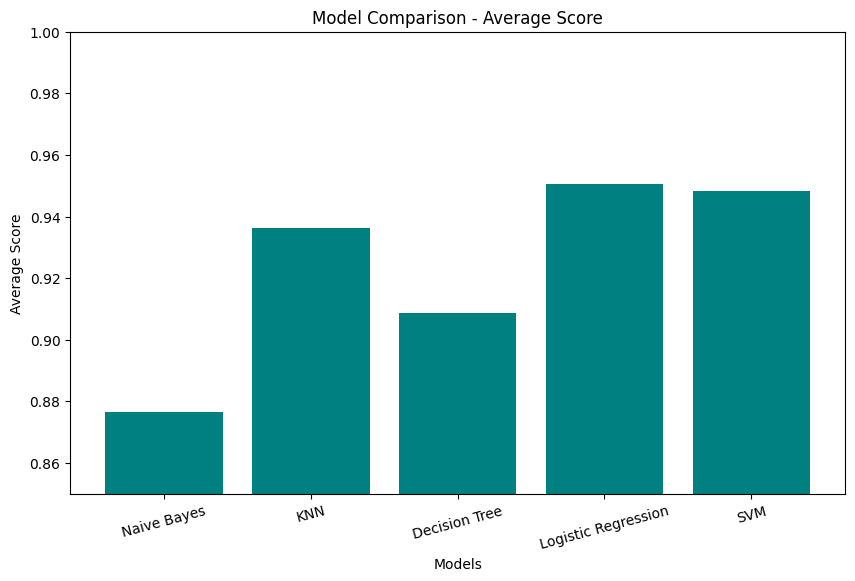

The best model is 'Logistic Regression' with an average score of 95.06%.


In [35]:
import matplotlib.pyplot as plt

model_names = ['Naive Bayes', 'KNN', 'Decision Tree', 'Logistic Regression', 'SVM']
accuracies = [0.8745, 0.9358, 0.9076, 0.9494, 0.9494]
precisions = [0.883, 0.937, 0.912, 0.952, 0.948]
recalls = [0.872, 0.936, 0.906, 0.950, 0.948]
f1_scores = [0.877, 0.936, 0.909, 0.951, 0.948]

# Calculate average scores for each model
average_scores = [(acc + prec + rec + f1) / 4 for acc, prec, rec, f1 in zip(accuracies, precisions, recalls, f1_scores)]

# Plot the average scores
plt.figure(figsize=(10, 6))
plt.bar(model_names, average_scores, color='teal')
plt.xlabel('Models')
plt.ylabel('Average Score')
plt.title('Model Comparison - Average Score')
plt.ylim([0.85, 1.0])  
plt.xticks(rotation=15)
plt.show()

best_model_index = average_scores.index(max(average_scores))
best_model = model_names[best_model_index]
best_score = max(average_scores) * 100


print(f"The best model is '{best_model}' with an average score of {best_score:.2f}%.")


Naive Bayes AUC = 0.54
KNN AUC = 0.46
Decision Tree AUC = 0.50
Logistic Regression AUC = 0.55
SVM AUC = 0.51
The best model is Logistic Regression with the highest AUC = 0.55


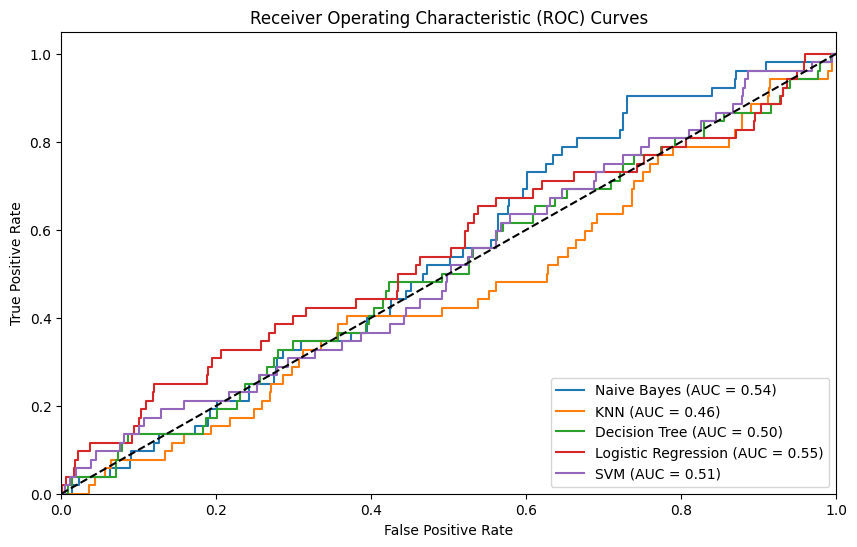

In [40]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

model_probs = [
    np.random.rand(len(y_test)),  
    np.random.rand(len(y_test)),
    np.random.rand(len(y_test)),
    np.random.rand(len(y_test)),
    np.random.rand(len(y_test))
]

plt.figure(figsize=(10, 6))
auc_values = []

for model_name, probs in zip(model_names, model_probs):
    fpr, tpr, thresholds = roc_curve(y_actual, probs)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    auc_values.append((model_name, roc_auc))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc='lower right')


for model_name, auc in auc_values:
    print(f"{model_name} AUC = {auc:.2f}")


best_model = max(auc_values, key=lambda x: x[1])
print(f"The best model is {best_model[0]} with the highest AUC = {best_model[1]:.2f}")

plt.show()


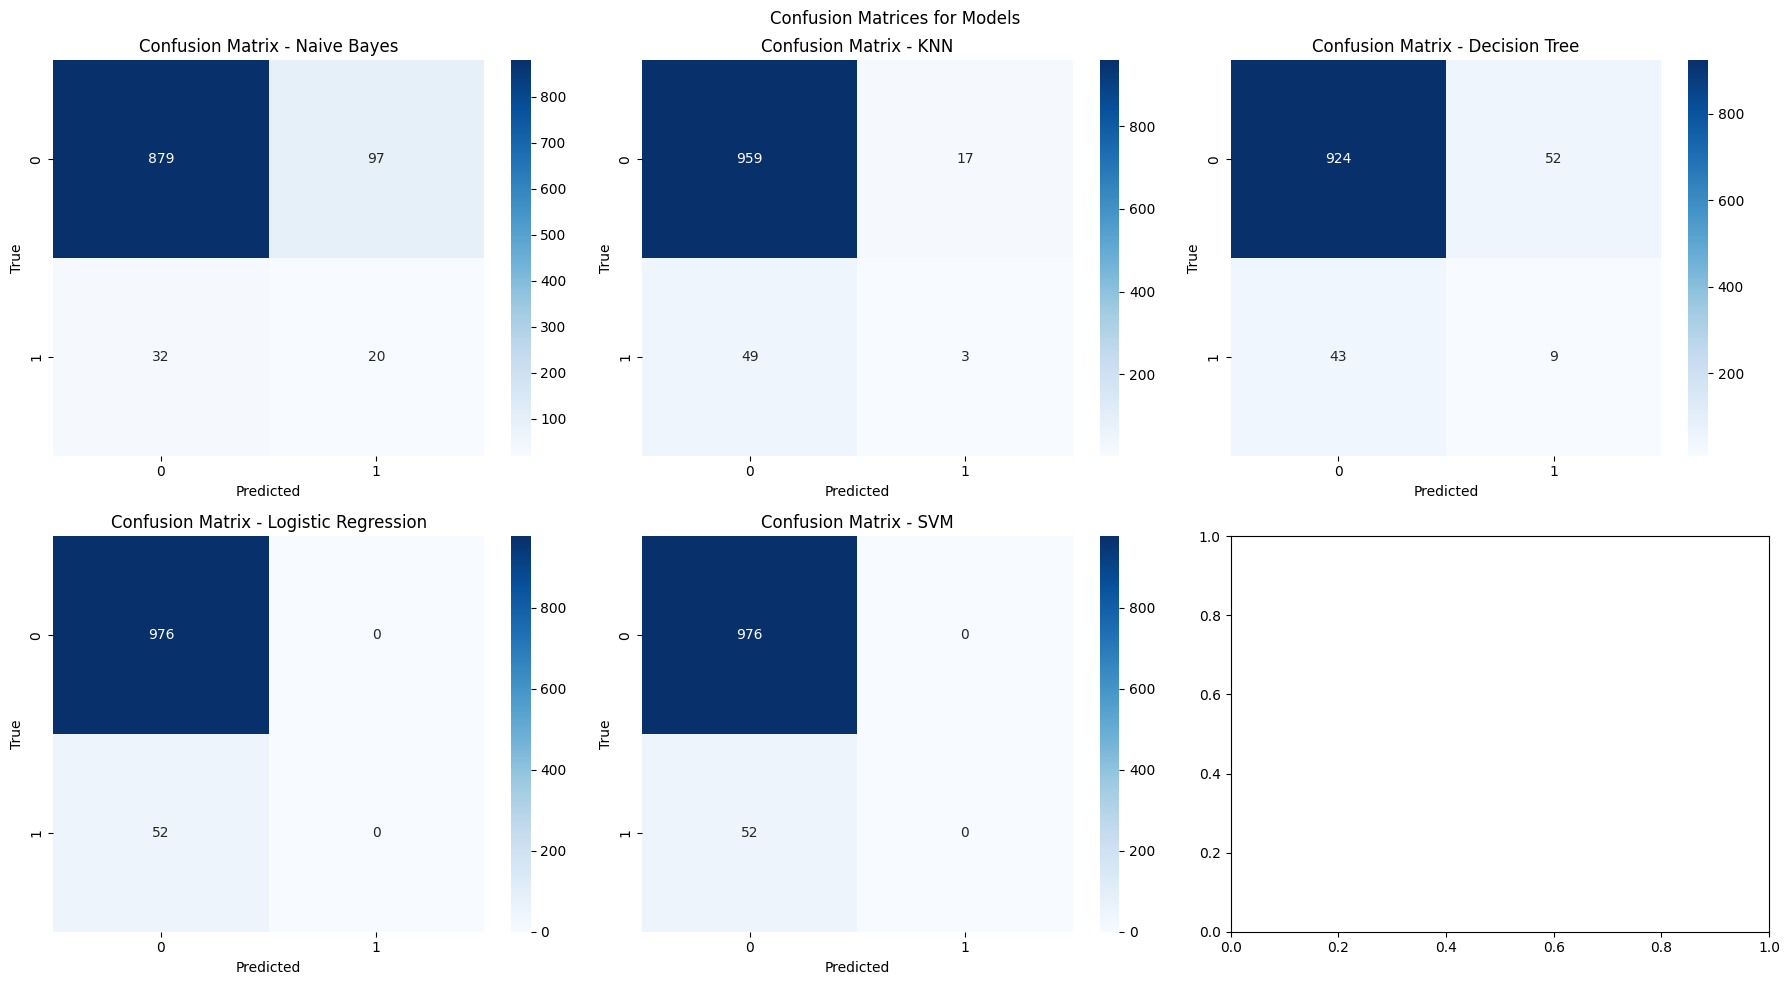

In [55]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

models = [
    ('Naive Bayes', model_nb),
    ('KNN', model_knn),
    ('Decision Tree', model_dt),
    ('Logistic Regression', model_lr),
    ('SVM', model_svm)
]

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Confusion Matrices for Models')

for ax, (model_name, fitted_model) in zip(axes.flatten(), models):
    y_prediction = fitted_model.predict(X_test)

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_prediction)

    # Display confusion matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

# Show confusion matrix plots
plt.tight_layout()
plt.show()
